In [109]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate as interp

In [81]:
import pandas as pd

In [82]:
params = {}

In [83]:
np.random.seed(10)

In [84]:
params['lsize'] = np.arange(20,50)
np.random.shuffle(params['lsize'])

In [85]:
params['lrate'] = np.linspace(5e-5,5e-3,30)
np.random.shuffle(params['lrate'])

In [86]:
params['bsize'] = np.arange(8,128,4)
np.random.shuffle(params['bsize'])

In [87]:
params['drate'] = np.linspace(0.1,0.6,30)
np.random.shuffle(params['drate'])

In [88]:
params['deg']   = np.linspace(0,29,30)
np.random.shuffle(params['deg'])

In [91]:
df = pd.DataFrame.from_dict(params)

In [93]:
df_sample = df.sample(20)

In [120]:
df_sample = df_sample.reset_index()
df_sample

,level_0,index,lsize,lrate,bsize,drate,deg
0,0,3,22,0.002952,72,0.324138,8.0
1,1,12,38,0.001245,84,0.548276,25.0
2,2,28,24,0.003293,104,0.531034,29.0
3,3,22,28,0.000733,40,0.151724,20.0
4,4,7,47,0.004659,100,0.289655,12.0
5,5,27,35,0.004317,120,0.255172,16.0
6,6,16,44,0.002610,52,0.358621,13.0
7,7,26,20,0.005000,80,0.186207,0.0
8,8,8,32,0.003634,116,0.272414,21.0
9,9,23,45,0.000221,16,0.496552,26.0


In [134]:
df_sample['final_err'] = np.zeros(20)
df_sample['min_err'] = np.zeros(20)
df_sample['final_deriv'] = np.zeros(20)
df_sample['avg_deriv'] = np.zeros(20)

In [135]:
df_1['Step']

0     5000
1    10000
2    15000
3    20000
4    25000
5    30000
6    35000
7    40000
8    45000
Name: Step, dtype: int64

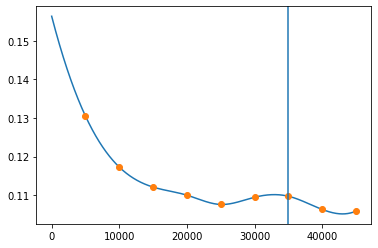

In [148]:
# use minimum between minimum and curent value+mean(deriv)*delta_step (delta_step=50000)?
for ii in range(1):
    df_1 = pd.read_csv('/global/homes/v/vboehm/codes/PAE/train_param_search/AE_sample%d.csv'%(ii+1))
    splrep = interp.splrep(df_1['Step'], df_1['Value'])
    num    = df_1['Step'].to_numpy()[-1]
    plt.plot(np.arange(num),interp.splev(np.arange(num),splrep))
    plt.plot(df_1['Step'], df_1['Value'],ls='', marker='o')
    deriv = interp.splev(np.arange(num),splrep,der=1)
    minimum = min(interp.splev(np.arange(num),splrep))
    df_sample.at[ii,'final_err'] = df_1['Value'].to_numpy()[-1]
    df_sample.at[ii,'min_err']   = minimum
    df_sample.at[ii,'final_deriv'] = deriv[-1]
    df_sample.at[ii,'avg_deriv'] = np.mean(deriv[-10000::])
    plt.axvline(num-10000)

In [149]:
df_sample

,level_0,index,lsize,lrate,bsize,drate,deg,final_err,min_err,final_deriv,avg_deriv
0,0,3,22,0.002952,72,0.324138,8.0,0.105902,0.105165,7.834514e-07,-3.839884e-07
1,1,12,38,0.001245,84,0.548276,25.0,0.000000,0.000000,0.000000e+00,0.000000e+00
2,2,28,24,0.003293,104,0.531034,29.0,0.000000,0.000000,0.000000e+00,0.000000e+00
3,3,22,28,0.000733,40,0.151724,20.0,0.000000,0.000000,0.000000e+00,0.000000e+00
4,4,7,47,0.004659,100,0.289655,12.0,0.000000,0.000000,0.000000e+00,0.000000e+00
5,5,27,35,0.004317,120,0.255172,16.0,0.000000,0.000000,0.000000e+00,0.000000e+00
6,6,16,44,0.002610,52,0.358621,13.0,0.000000,0.000000,0.000000e+00,0.000000e+00
7,7,26,20,0.005000,80,0.186207,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00
8,8,8,32,0.003634,116,0.272414,21.0,0.000000,0.000000,0.000000e+00,0.000000e+00
9,9,23,45,0.000221,16,0.496552,26.0,0.000000,0.000000,0.000000e+00,0.000000e+00


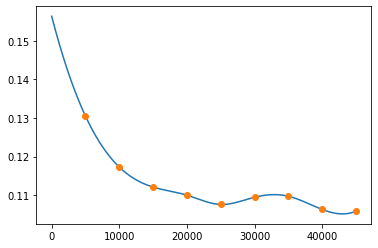

array(7.83912164e-07)